<a href="https://colab.research.google.com/github/tenzing1/Tweet-Decoder/blob/main/Tenzing_231030063_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data **Manipulation**

Importing dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/newdatas/netflix_titles.csv',encoding = 'latin1')

Display first 10 rows in the dataset

In [ ]:
df.head(11)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Check data types of **columns**

In [ ]:
print(type(df))
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      flo

Summary of Statistics for numerical columns in dataset

In [ ]:
summary_statistics = pd.DataFrame(columns=['release_year', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                                           'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
                                           'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                                           'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
                                  index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Calculate statistics for release_year
release_year_stats = df['release_year'].describe()

# Populate the summary_statistics DataFrame
summary_statistics.loc['count', 'release_year'] = release_year_stats['count']
summary_statistics.loc['mean', 'release_year'] = release_year_stats['mean']
summary_statistics.loc['std', 'release_year'] = release_year_stats['std']
summary_statistics.loc['min', 'release_year'] = release_year_stats['min']
summary_statistics.loc['25%', 'release_year'] = release_year_stats['25%']
summary_statistics.loc['50%', 'release_year'] = release_year_stats['50%']
summary_statistics.loc['75%', 'release_year'] = release_year_stats['75%']
summary_statistics.loc['max', 'release_year'] = release_year_stats['max']

# Fill NaN for Unnamed columns (since they have no data)
summary_statistics.fillna(value='NaN', inplace=True)

# Print the summary statistics DataFrame
#print(summary_statistics)
summary_statistics.head()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_counts = df.isnull().sum()

unnamed_columns = [f'Unnamed: {i}' for i in range(12, 26)]
for col in unnamed_columns:
    null_counts[col] = df.shape[0]

print("Null value counts:")
print(null_counts)


Null value counts:
show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


Delete unwanted columns from dataset

In [ ]:
columns_to_drop = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                   'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                   'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
                   'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
                   'Unnamed: 24', 'Unnamed: 25']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


Check the number of rows and columns present in the dataset

In [ ]:
num_rows, num_cols = df.shape
print(f"({num_rows}, {num_cols})")

(8809, 12)


 Replace null values in 'director', 'cast', 'country', 'date_added', 'rating', and 'duration'
with appropriate placeholders or imputation

In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill missing values
df['rating'].fillna(df['rating'].mode()[0], inplace=True)  # Fill with mode
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

Exploratory data Analysis

In [ ]:
print(df['type'].value_counts())

type
Movie      6132
TV Show    2677
Name: count, dtype: int64


# **Data Visualisation**

Analysing number of Movies and TV show present in the dataset

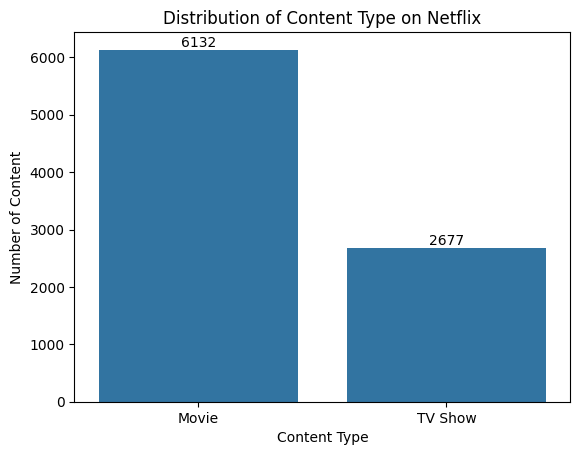

In [ ]:
ax = sns.countplot(x='type', data=df)

ax.set_title("Distribution of Content Type on Netflix")
ax.set_xlabel("Content Type")
ax.set_ylabel("Number of Content")

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Top 5 countries with most production of Movies and TV shows

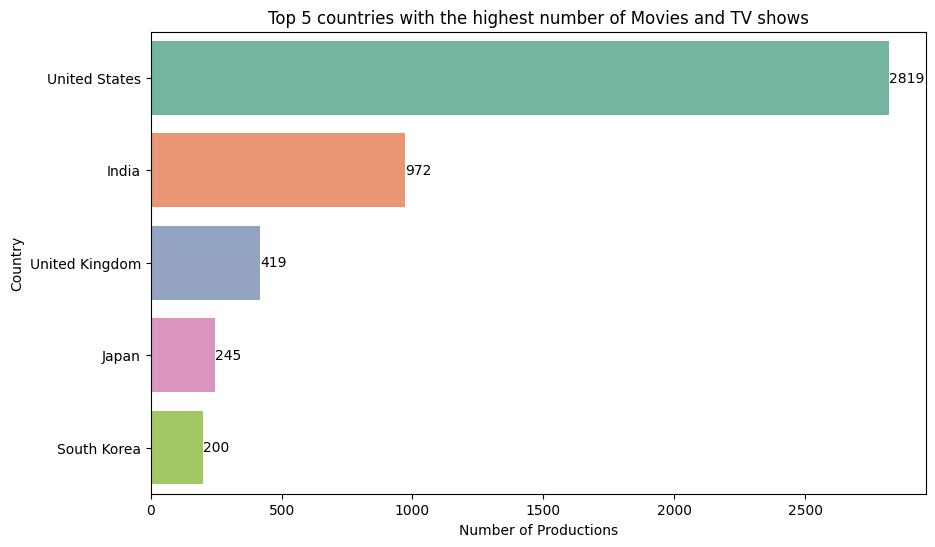

In [ ]:
# Assuming df is your DataFrame containing the data
top_5 = df['country'].value_counts().head(6)  # Get top 6 countries (including 'Unknown')
top_5 = top_5.drop("Unknown")  # Drop 'Unknown' if present

# Create the bar plot
bx = sns.barplot(x=top_5.values, y=top_5.index, palette='Set2')
bx.figure.set_size_inches(10, 6)  # Set figure size
bx.set_title("Top 5 countries with the highest number of Movies and TV shows")
bx.set_ylabel("Country")
bx.set_xlabel("Number of Productions")

# Add labels to the bars
for container in bx.containers:
    bx.bar_label(container)

plt.show()

Top 5 countries with highest Movies produced

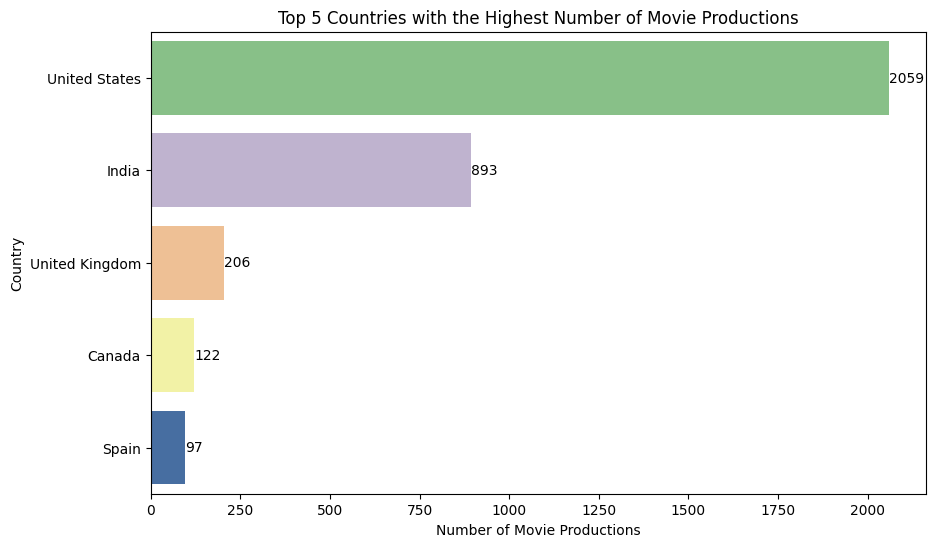

In [ ]:
#import matplotlib.pyplot as plt, is used
#import seaborn as sns, is used

top_5_m = df[df['type'] == 'Movie']
count_per_country = top_5_m['country'].value_counts().head(6)
count_per_country = count_per_country.drop("Unknown", errors='ignore')

cx = sns.barplot(y=count_per_country.index, x=count_per_country.values, palette='Accent')
cx.figure.set_size_inches(10, 6)  # Set figure size
cx.set_title("Top 5 Countries with the Highest Number of Movie Productions")
cx.set_ylabel("Country")
cx.set_xlabel("Number of Movie Productions")
for container in cx.containers:
    cx.bar_label(container)

plt.show()

Analysing number of Movies, TV Shows and Total Released each year
Group the data by 'release_year' and 'type', and count the occurrences

In [ ]:
type_counts = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

Calculate the total count of movies and TV shows each year

Reset the index to make 'release_year' a column

In [ ]:
type_counts['total'] = type_counts['Movie'] + type_counts['TV Show']
type_counts = type_counts.reset_index()

Plot using Seaborn line *plot*

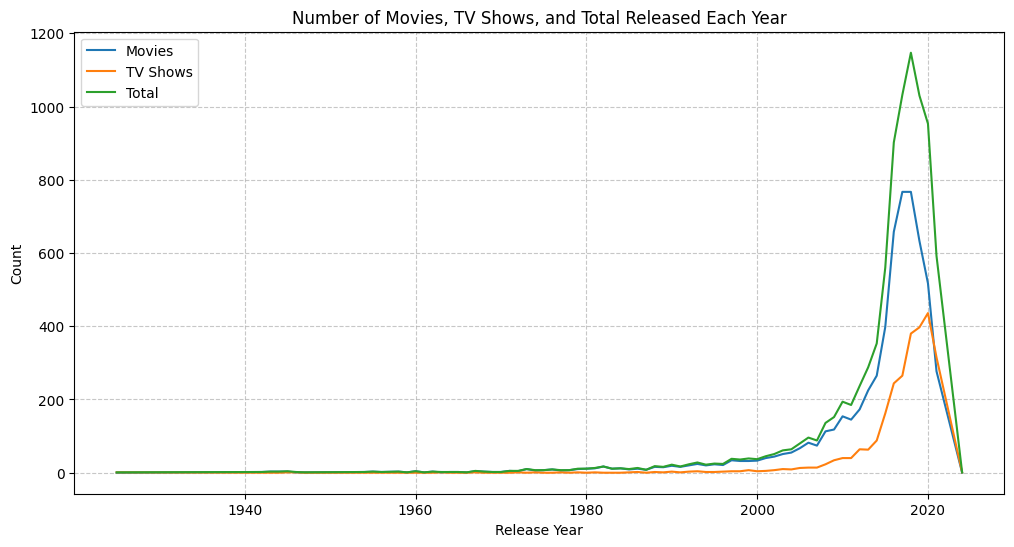

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=type_counts, x='release_year', y='Movie', label='Movies')
sns.lineplot(data=type_counts, x='release_year', y='TV Show', label='TV Shows')
sns.lineplot(data=type_counts, x='release_year', y='total', label='Total')
plt.title('Number of Movies, TV Shows, and Total Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

Average duration of Movie on Netflix

Filter the DataFrame to include only movies


 Convert 'duration' column to numeric (assuming it's in a format like '90 min')


 Calculate the average duration of movies


 Plotting using Seaborn



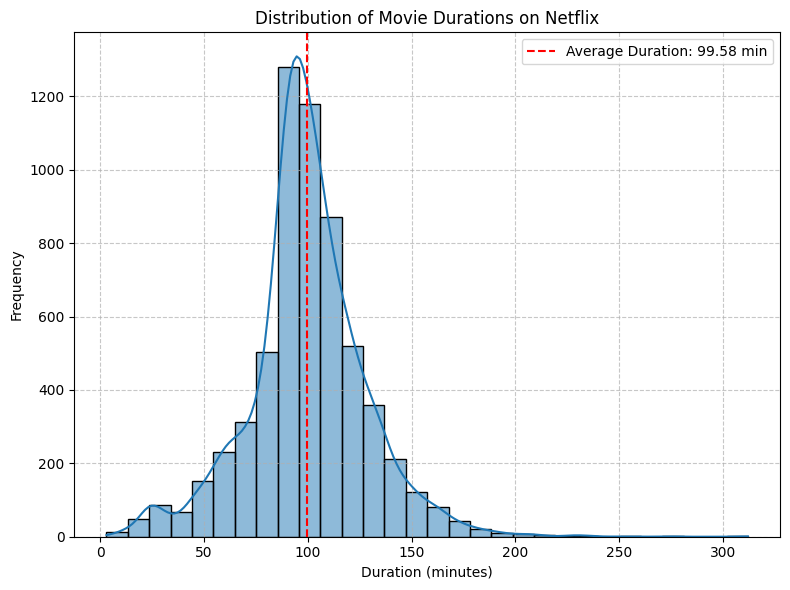

In [ ]:
movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)
avg_duration = movies_df['duration'].mean()
plt.figure(figsize=(8, 6))
sns.histplot(data=movies_df, x='duration', bins=30, kde=True)
plt.axvline(x=avg_duration, color='red', linestyle='--', label=f'Average Duration: {avg_duration:.2f} min')
#TITLE. x label and Y label
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()